In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [2]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import calmap
from pandas_profiling import ProfileReport 

# Task1: Initial data exploration

In [4]:
df=pd.read_csv('E:/Farhan/sales.csv')

In [5]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01/05/2019  13:08      Ewallet  522.83                 4.761905   
1  03/08/2019  10:29         Cash   76.40                 4.761905   
2  03/03/2019  13:23  Credit card  324.31                 4.761905   
3   1/27/2019  20:33      Ewallet  465.76                 4.761905   
4  02/08/2019  10:37      Ewallet  604.17                 4.761905   

   gross income  Rating  
0       26.1415     9.1  
1        3.8200     9.6  
2       16.2155     7.4  
3       23.2880     8.4  
4       30.2085     5.3

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df["Date"]

0      01/05/2019
1      03/08/2019
2      03/03/2019
3       1/27/2019
4      02/08/2019
          ...    
995     1/29/2019
996    03/02/2019
997    02/09/2019
998     2/22/2019
999     2/18/2019
Name: Date, Length: 1000, dtype: object

Date is in string format, We have to convert it into DateTime format

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [11]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

Setting the Date Column as the index

In [12]:
df.set_index('Date')

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-01-29  233-67-5758      C  Naypyitaw        Normal    Male   
2019-03-02  303-96-2227      B   Mandalay        Normal  Female   
2019-02-09  727-02-1313      A     Yangon        Member    Male   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   

                      Product line  Unit price  Quantity   Tax 5%      Total  \
Date                                                                           
2019-01-05       Health and beauty       74.69         7  26.1415   548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200    80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155   340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880   489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085   634.3785   
...                            ...         ...       ...      ...        ...   
2019-01-29       Health and beauty       40.35         1   2.0175    42.3675   
2019-03-02      Home and lifestyle       97.38        10  48.6900  1022.4900   
2019-02-09      Food and beverages       31.84         1   1.5920    33.4320   
2019-02-22      Home and lifestyle       65.82         1   3.2910    69.1110   
2019-02-18     Fashion accessories       88.34         7  30.9190   649.2990   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
...           ...          ...     ...                      ...           ...   
2019-01-29  13:46      Ewallet   40.35                 4.761905        2.0175   
2019-03-02  17:16      Ewallet  973.80                 4.761905       48.6900   
2019-02-09  13:22         Cash   31.84                 4.761905        1.5920   
2019-02-22  15:33         Cash   65.82                 4.761905        3.2910   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
...            ...  
2019-01-29     6.2  
2019-03-02     4.4  
2019-02-09     7.7  
2019-02-22     4.1  
2019-02-18     6.6  

[1000 rows x 16 columns]

In [13]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0   2019-01-05  13:08      Ewallet  522.83                 4.761905   
1   2019-03-08  10:29         Cash   76.40                 4.761905   
2   2019-03-03  13:23  Credit card  324.31                 4.761905   
3   2019-01-27  20:33      Ewallet  465.76                 4.761905   
4   2019-02-08  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995 2019-01-29  13:46      Ewallet   40.35                 4.761905   
996 2019-03-02  17:16      Ewallet  973.80                 4.761905   
997 2019-02-09  13:22         Cash   31.84                 4.761905   
998 2019-02-22  15:33         Cash   65.82                 4.761905   
999 2019-02-18  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

# Task 2: Univariate Analysis



###  The distribution of customer ratings

C:\Users\usman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

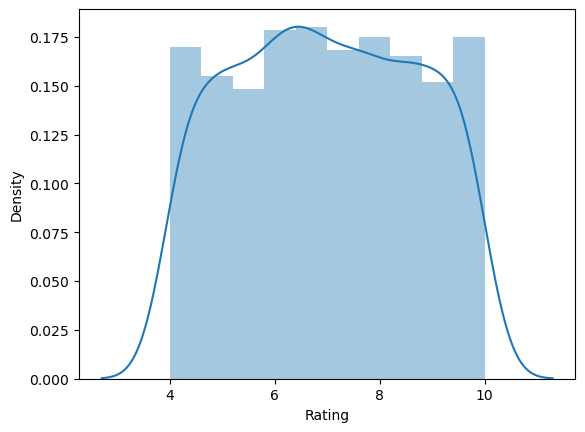

In [14]:
sns.distplot(df['Rating'])

C:\Users\usman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


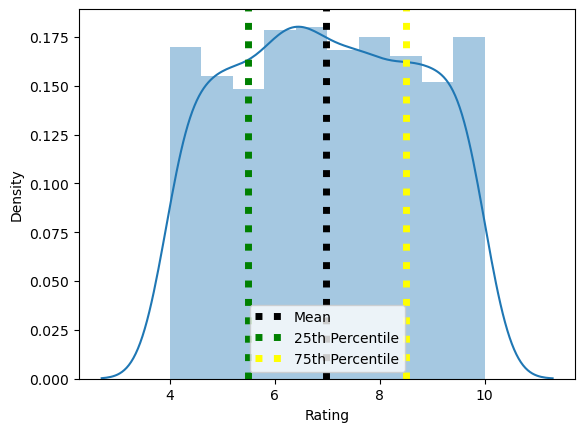

In [15]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),color='Black',linestyle='dotted',linewidth=5,label='Mean')
plt.axvline(x=np.percentile(df['Rating'],25),color='Green',linestyle='dotted',linewidth=5,label='25th Percentile')
plt.axvline(x=np.percentile(df['Rating'],75),color='Yellow',linestyle='dotted',linewidth=5,label='75th Percentile')
plt.legend()

This distribution is Uniform/Normal

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'cogs'}>],
       [<AxesSubplot:title={'center':'gross margin percentage'}>,
        <AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

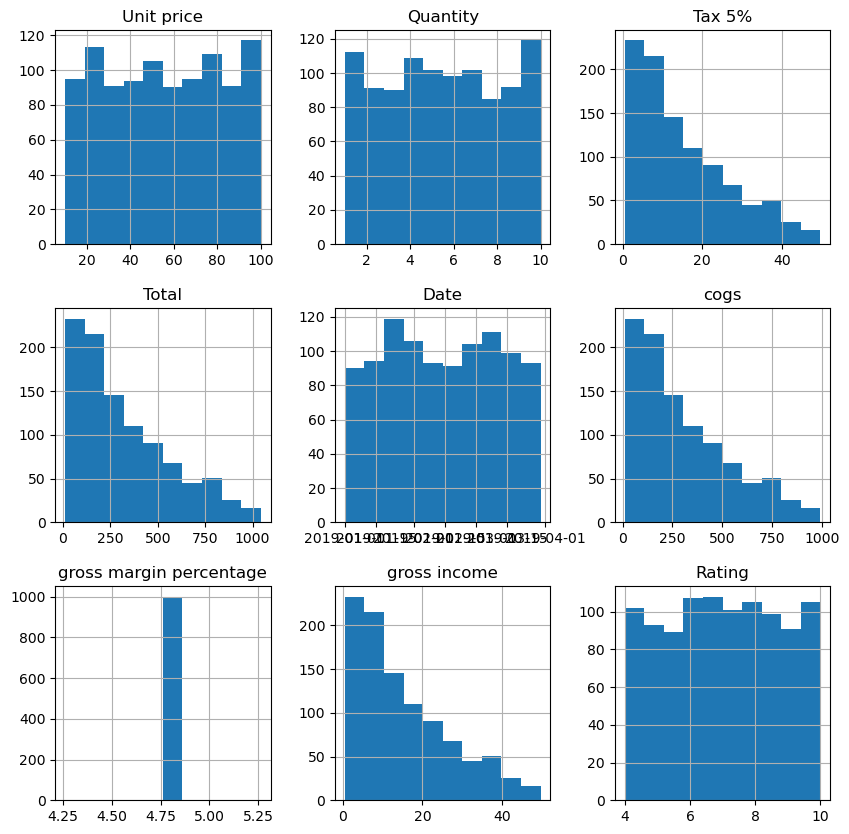

In [16]:
df.hist(figsize=(10,10))

 Distribution for other variables

#### Aggregate sales number between branches

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

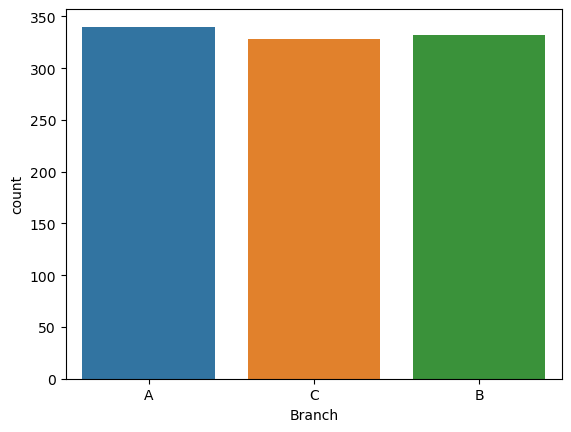

In [17]:
sns.countplot(df['Branch'])

In [18]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

### Payment Methods

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

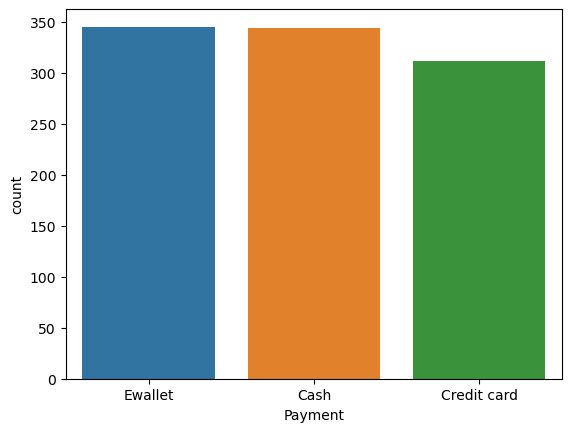

In [19]:
sns.countplot(df['Payment'])

# Task3: Bivariate Analysis

Relationship b/w gross income and customer ratings

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

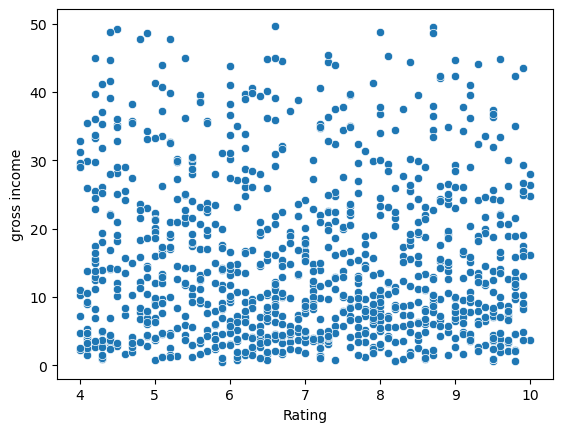

In [20]:
sns.scatterplot(df['Rating'],df['gross income'])

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

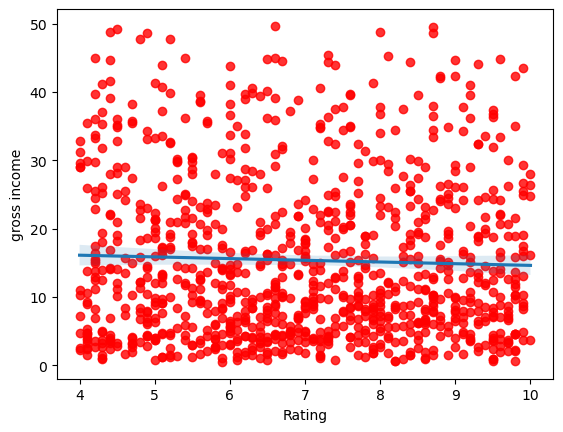

In [21]:
sns.regplot(df['Rating'],df['gross income'],scatter_kws={'color':'red'})

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

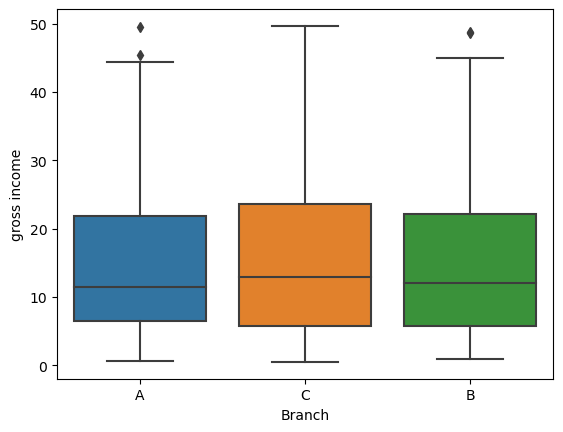

In [22]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

Relationship b/w branch and gross income

# Task4: Dealing with duplicate rows and missing values

In [23]:
df.duplicated()    
# This shows whether the rows are duplicate or not

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [24]:
df.duplicated().sum()
# this shows the number of duplicate values 

0

In [25]:
df[df.duplicated()==True]
# this returns the duplicated rows

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [26]:
df.drop_duplicates(inplace=True)
# this deletes duplicate values

In [27]:
df.isna().sum()
# this returns the columns with null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Profiling Report

In [28]:
pr=pd.read_csv('E:/Farhan/sales.csv')
a=ProfileReport(pr)
a

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]